**What will we learn?**
1. **Introduction**: What is KNN
2. **Correct value of K**: Finding the number of nearest neighbours
3. **Distance Metric**: Understanding various Distance Metrices
4. **Variations in KNN**: Uniform or weighted voting
5. **Feature Scaling**
6. **Scikit-learn Implementation**
7. **Cross Validation**: Dividing the training data into k folds.
8. **Self-implementation of KNN**: Code for KNN
9. **Data preparation for KNN**
10. **Curse of Dimensionality**: Removing irrelevant features
11. **Other algorithms for KNN**: KDTree, BallTree
12. **Advantages and Disadvantages of KNN**: Pros and cons of using KNN classifier

##**KNN**

KNN stands for K-Nearest Neighbours. KNN is simple classification algorithm and it is generally used for datasets in which data points are separated into several classes and we have to predict the class for the new sample point.
KNN is <b>non-parametric</b> and <b>lazy</b> learning algorithm.

<b>Non-parametric</b> means that the algorithm does not make any assumptions on the given data distribution. Non-parametric covers technique that do not rely on data belonging to particular distribution and do not assume the structure of model to be fixed. So, KNN is used as classification algorithm in cases where we do not have much information about the distribution of the data.

KNN is referred to as <b>Lazy</b> algorithm since is does not use training points to do any generalization, which means that there is no separate training phase. KNN keeps all the training data and uses most of the training data during the testing phase. Thus, KNN does not learn any model, it make predictions on the fly, computing similarity between testing point and each training data point.

KNN algorithm is  based on <b>feature similarity</b>. We can classify the testing data point on the basis of resemblance of its features with that of the training data set.

<img src="https://files.codingninjas.in/knn_intro-7470.png" width="700">

The test sample (green circle) should either be classified into Class 1(blue squares) or Class 2 (red triangles). The class for the sample testing point is decided on the basis of majority vote-out.


##**How to choose the correct value of 'K'?**


'K' in KNN is a parameter that refers to the number of nearest neighbours to include in the majority of the voting process.

If value of K is 1, the nearest training point belongs to Class 1, so we will say that the testing sample belongs to Class 1. Now, take the value of K to be 3, again using the methodology of majority vote, we will say that testing sample belongs to Class 2 (red traingles), since out of three nearest training data points, two belongs to Class 2 and one belong to Class 1.

1. A very low value for K such as K = 1 or K = 2, can be noisy and lead to the effects of outliers in the model.
2. Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.
3. In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.

KNN can be used for Classification as well as Regression.

While using KNN for classification - output is a class membership, we will classify the sample point using the technique of majority vote among its neighbors and the most common class among its K nearest neighbours is assigned to the testing point. In regression, output is the property value of object, this value is average or median of the value of its K nearest neighbors.

In classification, KNN is used to predict a class which is a discrete value whereas in regression, KNN predicts continuous values

###**Why don't we choose value value of K to be 1 ?**

Choosing the value of K to be 1 makes our model more prone to outliers and overfitting. Value of 1 means that we will consider only the closest (or nearest) neighbor to predict the class for our testing sample, and in majority of the cases it will lead to overfitting

<img src="https://files.codingninjas.in/knn-1-7479.jpg" width="550">

Consider the case here, if we choose value of K to be 1, the given training sample will get classified as dot (Class 2), instead of being classified as a cross (Class 1). So, in such cases certain optimal value of K should be chosen to get good results. Choosing the value of K to be 1, leads to formation of complex decision boundaries and hence will lead to overfitting.

Since we will be using the majority vote technique, so value of K is taken to be odd, to obtain clear result about the class of the testing data sample.

##**Distance Metric for KNN**

There are various distance metrices that can be chosen such as Manhattan Distance, Euclidian Distance, etc.

$$Manhattan \;Distance = |\sum_{i=1}^n X_1^i - X_2^i|$$
$$Euclidian\; Distance = \sqrt{(\sum_{i=1}^n (X_1^i-X_2^i)^2)} $$

Where $X_1$ and $X_2$ are two different data points and $i$ traverses over all the features in the given dataset.

##**Variations in KNN**

Variations in KNN are possible on the basis of how neighbouring points are going to vote. The weight of the vote of the testing point(s) is inversely proportional to its distance from the testing point. We can go either with uniform voting or with weighted voting. In case of weighted voting, the point nearer to the testing sample will have a larger say in the vote as compared to the point which is farther away from the testing point

##**Feature Scaling before KNN**

In KNN, we are looking for points which are closest to the testing point. In case we do not perform feature scaling, if we have value of one feature in thousands and value of other feature in smaller units, then the effect of first feature will completely overpower and dominate over the effect of second feature in the final output. So, it is of utmost importance to apply feature scaling before applying KNN so that all the features have equal contribution in the final predicted output for the given testing point.

##**KNN in Sklearn**

We will be applying KNN on Breast Cancer Dataset and use inbuilt KNN Classifier inside sklearn.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
cancer = datasets.load_breast_cancer()

In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 0)

In [6]:
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)

KNeighborsClassifier()

In [7]:
clf.score(x_test, y_test)

0.9385964912280702

Default value of K (number of neighbors) is equal to 5 in Sklearn. By default, Sklearn implements Minkowski distance metric. General form of Minkowski distance is :
$$Minkowski \;Distance = |\sum_{i=1}^n (X_1^i - X_2^i)^p|^{\frac{1}{p}}$$
If p = 1, that means we are using Manhattan Distance and if p = 2, that means we are using Euclidian Distance

##**Cross Validation**

The best value of K is the one for which we get lowest error on testing data. So, what we can do is to repeatedly train our model using both training and testing data, for different values of parameter K and then finally choose value of K which results in minimum error. But in this process, we are using the testing data as a part of our training process to obtain the optimal value of K. Hence, this process is not to be used. On the other hand if we use only training data and tune the value of parameter K, it will lead to overfitting. This will result in lower value of error on training data, but comparatively higher value of error on the testing data.

So, to obtain the optimal value of K, we use a method known as CROSS VALIDATION. Cross Validation basically means taking out the subset from the training data and not using this subset in the training process. This subset of training data is called the 'validation set'. There are various techniques available for cross validation, we will be using the most general one, known as K-fold cross validation.

<img src="https://files.codingninjas.in/knn_crossval-7474.png" width="700">

In K-fold cross validation, the training data is randomly split into K different samples (or folds). One of the sample is taken to be the validation set and the model is fitted on the remaining (K - 1) samples. The accuracy of the model is then computed. The same process is repeated K times, each time taking a different sample of points to be in the validation set. This results in K values for test error and these values are averaged out to obtain the overall result.

Cross Validation is used to estimate the test error and generate more robust models

###**Cross Validation in Sklearn**

The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset.

In [8]:
x_axis = []
k_scores = []
for k in range(1,50, 2):
    x_axis.append(k)
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
    #Printing values
    print("K = ",k)
    print("Scores : ")
    print(scores)
    print("Mean Score = ",scores.mean())
    print()

K =  1
Scores : 
[0.93478261 0.95652174 0.91304348 0.84782609 0.86956522 0.93333333
 0.97777778 0.91111111 0.93333333 0.93333333]
Mean Score =  0.9210628019323671

K =  3
Scores : 
[0.91304348 0.95652174 0.86956522 0.93478261 0.89130435 0.95555556
 0.95555556 0.88888889 0.95555556 0.95555556]
Mean Score =  0.927632850241546

K =  5
Scores : 
[0.95652174 0.97826087 0.86956522 0.91304348 0.91304348 0.93333333
 0.97777778 0.86666667 0.95555556 0.91111111]
Mean Score =  0.9274879227053141

K =  7
Scores : 
[0.95652174 0.95652174 0.89130435 0.91304348 0.89130435 0.97777778
 0.97777778 0.86666667 0.95555556 0.93333333]
Mean Score =  0.9319806763285025

K =  9
Scores : 
[0.95652174 0.95652174 0.89130435 0.91304348 0.86956522 0.97777778
 0.97777778 0.86666667 0.95555556 0.95555556]
Mean Score =  0.9320289855072463

K =  11
Scores : 
[0.95652174 0.95652174 0.91304348 0.91304348 0.89130435 0.97777778
 0.97777778 0.86666667 0.93333333 0.93333333]
Mean Score =  0.9319323671497586

K =  13
Scores :

When the cv argument is an integer, cross_val_score uses the K-Fold or Stratified K-Fold strategies by default. 

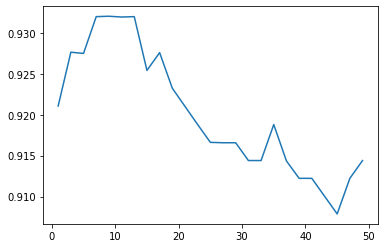

In [9]:
plt.plot(x_axis, k_scores)
plt.show()

In [10]:
optimal_k = x_axis[k_scores.index(max(k_scores))]
optimal_k

9

**K-Fold and  Stratified K-Fold**

K-Fold divides all the samples in $k$ groups of samples, called folds. The prediction function is learned using $k-1$ folds, and the fold left out is used for test. 
For More Details , refer to the documentation : 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html?highlight=kfold#sklearn.model_selection.KFold

Stratified K-Fold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold


In [11]:
from sklearn.model_selection import KFold
x_axis = []
k_scores = []
for k in range(1,50, 2):
    x_axis.append(k)
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, x_train, y_train, cv=KFold(10), scoring='accuracy')
    k_scores.append(scores.mean())
    
    #Printing values
    print("K = ",k)
    print("Scores : ")
    print(scores)
    print("Mean Score = ",scores.mean())
    print()

K =  1
Scores : 
[0.91304348 0.97826087 0.93478261 0.84782609 0.82608696 0.86666667
 0.95555556 0.93333333 0.93333333 0.93333333]
Mean Score =  0.9122222222222222

K =  3
Scores : 
[0.91304348 0.97826087 0.89130435 0.93478261 0.84782609 0.91111111
 0.93333333 0.93333333 0.95555556 0.95555556]
Mean Score =  0.9254106280193237

K =  5
Scores : 
[0.95652174 0.97826087 0.89130435 0.91304348 0.89130435 0.91111111
 0.95555556 0.88888889 0.95555556 0.91111111]
Mean Score =  0.9252657004830919

K =  7
Scores : 
[0.95652174 0.97826087 0.89130435 0.91304348 0.86956522 0.95555556
 0.95555556 0.88888889 0.95555556 0.93333333]
Mean Score =  0.9297584541062802

K =  9
Scores : 
[0.95652174 0.97826087 0.89130435 0.91304348 0.86956522 0.95555556
 0.95555556 0.88888889 0.95555556 0.95555556]
Mean Score =  0.9319806763285025

K =  11
Scores : 
[0.95652174 0.97826087 0.91304348 0.91304348 0.84782609 0.95555556
 0.95555556 0.88888889 0.93333333 0.93333333]
Mean Score =  0.927536231884058

K =  13
Scores :

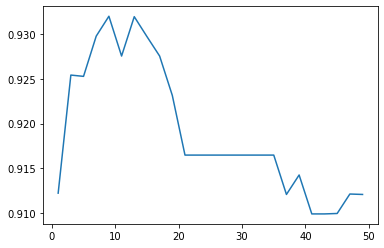

In [20]:
plt.plot(x_axis, k_scores)
plt.show()

In [21]:
optimal_k = x_axis[k_scores.index(max(k_scores))]
optimal_k

9

Using this way, we can choose the optimal value of K using cross validation. If the value of K is very less, for eg, say 1, it will lead to overfitting and will result in formation of complex decision boundaries. On the the hand, if the value of K is very high, we are basically underfitting and not actually taking class of neighbours into consideration. In this case, we predict the class of the testing sample from the majority class of the overall training data rather than from the majority class given by the neighbors.

Lower values of K corresponds to low bias but high variance and result in jagged and complex decision boundaries, while higher value of K corresponds to lower variance but increased bias and leads to formation of smoother decision boundaries.

![picture](https://files.codingninjas.in/knn_dec1-7476.png)  ![picture](https://files.codingninjas.in/knn_dec20-7477.png)

##**Self Implementation of KNN**

In [13]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score

In [14]:
cancer = datasets.load_breast_cancer()

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 0)

In [16]:
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [17]:
clf.score(X_test,Y_test)

0.9473684210526315

In [18]:
def train(x,y):
    return

def predict_one(x_train, y_train, x_test, k):
    distances = []
    for i in range(len(x_train)):
        distance = ((x_train[i,:] - x_test)**2).sum()
        distances.append([distance,i])
    distances = sorted(distances)
    targets = []
    for i in range(k):
        index_of_training_data = distances[i][1]
        targets.append(y_train[index_of_training_data])
    return Counter(targets).most_common(1)[0][0]
    
def predict(x_train, y_train, x_test_data, k):
    predictions = []
    for x_test in x_test_data:
        predictions.append(predict_one(x_train, y_train, x_test, k))
    return predictions

In [19]:
y_pred = predict(X_train, Y_train, X_test, 7)
accuracy_score(Y_test, y_pred)

0.9473684210526315

##**Prepare Data For KNN**



*   **Rescale Data**: KNN performs much better if all of the data has the same scale. Normalizing your data to the range [0, 1] is a good idea. It may also be a good idea to standardize your data if it has a Gaussian distribution 
*   **Address Missing Data**: Missing data will mean that the distance between samples can not be calculated. These samples could be excluded or the missing values could be imputed
* **Lower Dimensionality**: KNN is suited for lower dimensional data. You can try it on high dimensional data (hundreds or thousands of input variables) but be aware that it may not perform as well as other techniques. KNN can benefit from feature selection that reduces the dimensionality of the input feature space



##**Curse of Dimensionality**

In case of KNN, if our data has more irrelevant features, then it will lead to bad results. Also, if we have two correlated features, then both of these take part in the calculations and net effect due to addition of these becomes double, and we might up getting wrong results.

We can do following things to solve this problem :
1. **Assign weights to features**
$$\sum_{i=1}^n W_i * (X_1^i- X_2^i)^2$$
This can be used as the distance metric, to calculate distance between $X_1$ and $X_2$, where $W_i$ is the weight assigned to the $i^{th}$ feature. These weights can be choosen randomly or can be calculated using Gradient Descent and deciding upon the cost function which is to be minimised and hence, obtain these weights.

   This proves to be benificial in the cases where two features are highly correlated, in that case either both these features are going to get high weights or one is going to get high weight and other is going to get the lower weight. And, therefore, we can obtain better results using this technique.

2. **Feature Selection**

   We will apply feature selection before using KNN Classifier. Backward Elimination is the technique used for doing feature selection, using which we will keep few features and get rid of other features from all the features intially in the dataset. In this technique, we will traverse over all the features and obtain the accuracy score by keeping this feature and next time, by removing this feature. If the accuracy of the model improves on removing this feature, then we will exclude this feature, otherwise we will keep this feature and likewise do the same thing for all the features.

##**Other Algorithms for KNN**

KDTree and BallTree can be used to improve the performance the model. The basic intuition behind these is to build something like Binary Search Tree using the training data and then for the testing data traverse through the whole tree and on reaching the leaf node, obtain the K Nearest Neighbors from all the nodes traversed by the testing sample point.

For more details about these algorithms, refer to the documentation link http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

KDTree, BallTree, brute force method and other algorithms can be used depending upon the data. Applying various of these methods, we can see the results and compare their performance with different algorithms

##**Advantages and Disadvatages of KNN**

###**Advantages**

1. Easy to understand and code.
2. Works well for multi-class classification.
3. Insensitive to outliers for optimal choice for value of K, but accuracy can be affected from noise and irrelevant features.
4. Versatile i.e. can work for both classification and regression.

###**Disadvantages**

1. Computationally expensive, because the algorithm stores all the training data
2. Testing time is huge.
3. Sensitive to irrelevant features and scaling.
4. If training data split is biased i.e. majority of data points belong to particular class, then KNN also gets biased.